###  Generating descriptive statistics

In [388]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [389]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [390]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [391]:
df.shape

(5110, 12)

In [392]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Observation: 

The mean age is 43.2 years, with a standard deviation of 22.6 years. <br> <br>
The youngest person in the set is less than a year old and the oldest is 82 years old.<br> <br>
9.7% of the individuals hypertension and 5.4% have heart disease.<br> <br>
The average glucose level in the blood is 106.1 mg/dL, with a standard deviation of 45.3 mg/dL.<br> <br>
The average BMI is 28.9, with a standard deviation of 7.9<br> <br>
Only 4.9% of the individuals in the dataset had a stroke.

###  Stroke frequency on different parameters.

<AxesSubplot:title={'center':'Number of Strokes by gender'}, xlabel='gender', ylabel='count'>

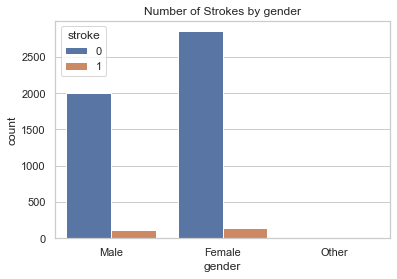

In [393]:
plt.title(f"Number of Strokes by {df.columns[1]}")
sns.countplot(x = df.columns[1], hue = "stroke", data = df)

<AxesSubplot:title={'center':'Number of Strokes by hypertension'}, xlabel='hypertension', ylabel='count'>

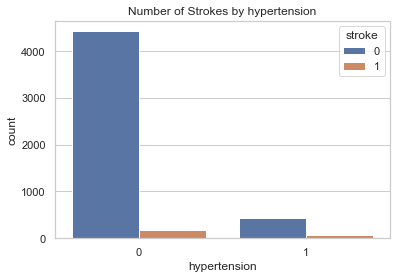

In [394]:
plt.title(f"Number of Strokes by {df.columns[3]}")
sns.countplot(x = df.columns[3], hue = "stroke", data = df)

<AxesSubplot:title={'center':'Number of Strokes by heart_disease'}, xlabel='heart_disease', ylabel='count'>

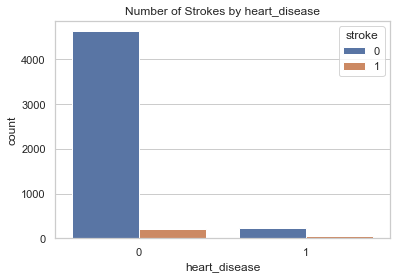

In [395]:
plt.title(f"Number of Strokes by {df.columns[4]}")
sns.countplot(x = df.columns[4], hue = "stroke", data = df)

<AxesSubplot:title={'center':'Number of Strokes by ever_married'}, xlabel='ever_married', ylabel='count'>

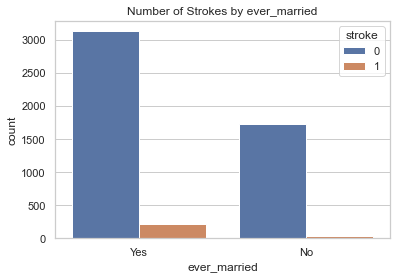

In [396]:
plt.title(f"Number of Strokes by {df.columns[5]}")
sns.countplot(x = df.columns[5], hue = "stroke", data = df)

<AxesSubplot:title={'center':'Number of Strokes by work_type'}, xlabel='work_type', ylabel='count'>

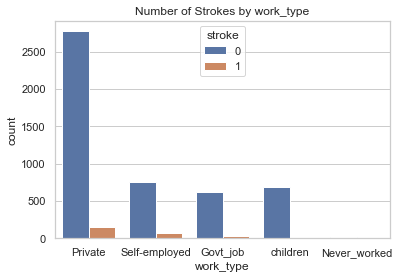

In [397]:

plt.title(f"Number of Strokes by {df.columns[6]}")
sns.countplot(x = df.columns[6], hue = "stroke", data = df)

<AxesSubplot:title={'center':'Number of Strokes by Residence_type'}, xlabel='Residence_type', ylabel='count'>

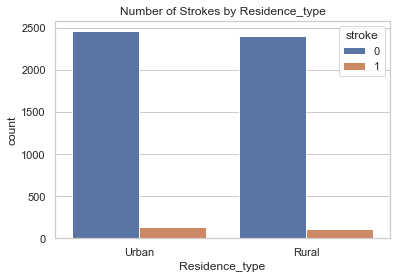

In [398]:
plt.title(f"Number of Strokes by {df.columns[7]}")
sns.countplot(x = df.columns[7], hue = "stroke", data = df)

<AxesSubplot:title={'center':'Number of Strokes by smoking_status'}, xlabel='smoking_status', ylabel='count'>

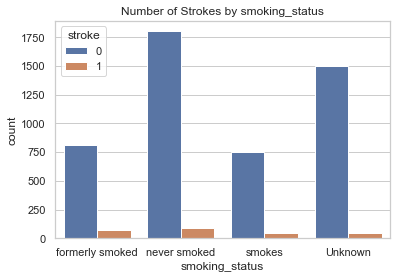

In [399]:
plt.title(f"Number of Strokes by {df.columns[10]}")
sns.countplot(x = df.columns[10], hue = "stroke", data = df)

### Distribution Plot for understanding age impacting stroke

C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


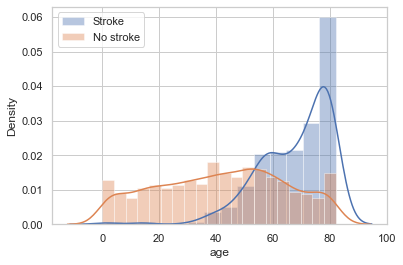

In [400]:
sns.distplot(df[df.stroke == 1].age, label="Stroke" )
sns.distplot(df[df.stroke == 0].age, label="No stroke")
plt.legend()

The impact of age, when it comes to having a stroke, is that the older you are, the higher the chance of a stroke will appear.

### Violin Plot to understand the patients likelihood of getting a stroke

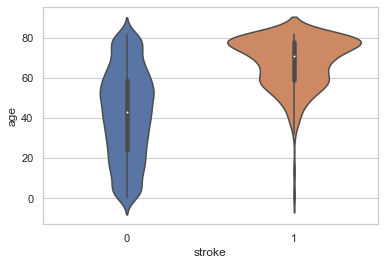

In [401]:
sns.set_style("whitegrid")
sns.violinplot(x = df.stroke, y = df.age, data=df)
plt.show()

The likelihood of getting a stroke, according to the violin plot, is at around 65-80

### Checking imbalance within the dataset

In [402]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Just checking the stroke count alone for people that haven't had a stroke (0) and people who had a stroke (1), this dataset is imbalanced. <br>There is a significant difference between both counts.

### Generate a heat map to understand the correlation among the variables

In [403]:
corr = df.corr()
corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:>

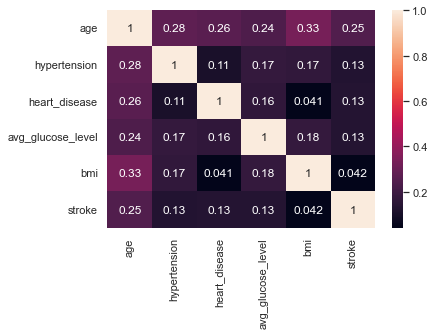

In [404]:
sns.heatmap(corr.iloc[1:, 1:], annot=True)

Looking at the heatmap and the correlation table, there are many correlations that are occurring. <br>
The variables with the strongest correlations are the following: <br><br>
Age & BMI - 0.33<br>
Hypertension and Age- 0.28 <br>
Heart Disease & Age - 0.26 <br><br>
This displays that age has a lot to do when it comes to the correlation of these variables.


### Checking for outliers in the bmi column and average_glucose column

Text(0, 0.5, 'density')

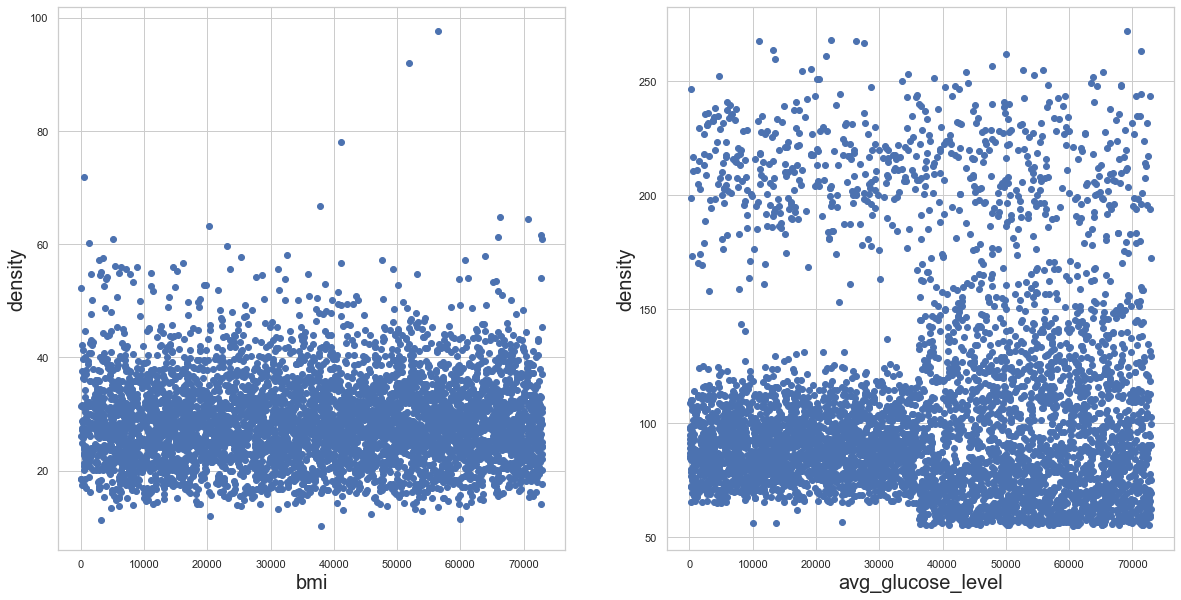

In [405]:
fig, (bmi_ax, avg_glucose_level_ax) = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 10))

bmi_ax.scatter(x = df['id'], y= df['bmi'])
bmi_ax.set_xlabel('bmi', fontsize = 20)
bmi_ax.set_ylabel('density', fontsize = 20)

avg_glucose_level_ax.scatter(x = df['id'], y= df['avg_glucose_level'])
avg_glucose_level_ax.set_xlabel('avg_glucose_level', fontsize = 20)
avg_glucose_level_ax.set_ylabel('density', fontsize = 20)

In [406]:
bmi_outliers = df.loc[df['bmi'] > 70]
avg_glucose_level_outliers = df.loc[df['avg_glucose_level'] > 170]

In [407]:
bmi_outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [408]:
avg_glucose_level_outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,68967,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,66684,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


##### Filtering out the outliers

In [409]:
df = df[(df['bmi'] < 70) & (df['avg_glucose_level'] < 170)]

In [410]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Handling the null values for BMI

In [416]:
miss_mean_imputer = SimpleImputer(missing_values = np.nan, strategy='mean', verbose = 0)


### Transforming the variables that are an object datatype

In [ ]:
df.dtypes

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])

df['ever_married'] = label_encoder.fit_transform(df['ever_married'])

df['work_type'] = label_encoder.fit_transform(df['work_type'])

df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])

df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

print(df.head())